<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/precision_recall_dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

п.1 Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Precision_Recall/athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
df['sex'].value_counts()

,count
sex,
male,6333
female,5205


In [11]:
X = pd.get_dummies(df, columns=['sex','sport'],dtype=int) #работа с категориальными столбцами
y=X['sex_male'] #назначение целевой переменной
X = X.drop(columns=['id','name','nationality','dob','sex_female','sex_male']) #удаление лишних столбцов
X = X.fillna(0) #меняем NaN на 0
X.head()

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


п.2 Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества. Решить задачу классификации при помощи обучения модели логистической регрессии

In [12]:
from sklearn.pipeline import make_pipeline  # используем пайплайны
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#model = LogisticRegression()

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
print('Точность модели LogisticRegression score для тренировочного датасэта ',round(model.score(X_train, y_train),3))
print('Точность модели LogisticRegression score для тестового датасэта ',round(model.score(X_test,y_test),3))

Точность модели LogisticRegression score для тренировочного датасэта  0.782
Точность модели LogisticRegression score для тестового датасэта  0.785


п.3 Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

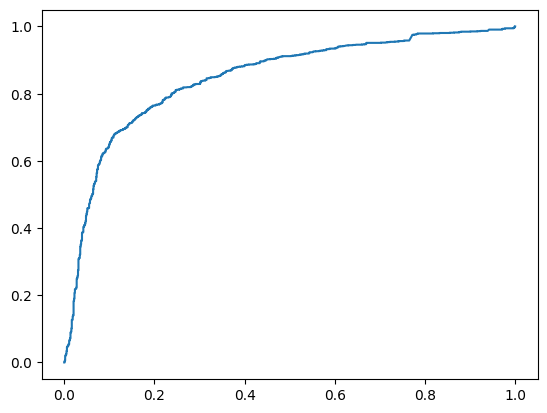

In [55]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

predictions = model.predict_proba(X_test)
fpr_skl, tpr_skl, thres = roc_curve( y_test, predictions[:, 1])

plt.plot( fpr_skl, tpr_skl )


п.4 Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predictions[:, 1])

0.8468700564455383

п.5 Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [52]:
def matrixerr(predict,ytest,porog):
    tp=0
    fp=0
    tn=0
    fn=0
    for predicted_prob,actual in zip(predict[:,1],y_test):
        if predicted_prob>=porog:
            predicted=1
        else:
            predicted=0
        if predicted==1 and actual==1:
            tp+=1
        elif predicted==1 and actual==0:
            fp+=1
        elif predicted==0 and actual==0:
            tn+=1
        elif predicted==0 and actual==1:
            fn+=1
    return tp,fp,tn,fn

porog=0.5
#predictions = model.predict_proba(X_test) расчет был сделан ранее
tp,fp,tn,fn = matrixerr(predictions,y_test,porog)
print (tp,fp,tn,fn)


1046 252 765 245


In [53]:
tpr=tp/(tp+fn)
print('TPR(precision)',round(TPR,2))
fpr=fp/(fp+tn)
print('FPR',round(FPR,2))
AC=(tp+tn)/(tp+tn+fn+fp)
print('ACCURACY',round(AC,3))

TPR(precision) 0.81
FPR 0.25
ACCURACY 0.785


п.6 Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

Text(0, 0.5, 'TPR')

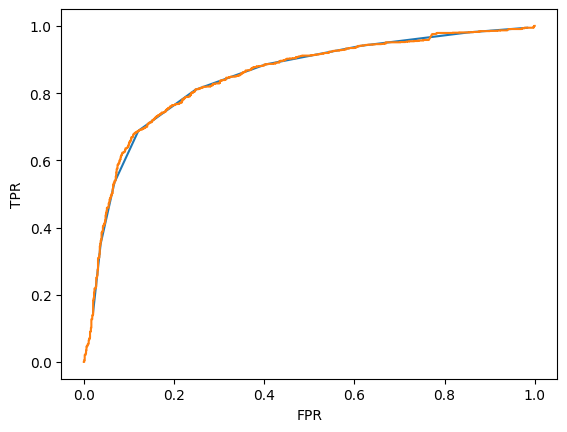

In [67]:
prob_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
tpr_l=[]
fpr_l=[]
for p in prob_list:
    tp,fp,tn,fn = matrixerr(predictions,y_test,p)
    tpr_buf=tp/(tp+fn)
    fpr_buf=fp/(fp+tn)
    tpr_l.append(tpr_buf)
    fpr_l.append(fpr_buf)

plt.plot( fpr_l,tpr_l ) #без sklearn
plt.plot(fpr_skl,tpr_skl) #с помощью sklearn
plt.xlabel('FPR')
plt.ylabel('TPR')

Вывод: ROC-кривые почти совпали, значит ROC-кривая в п.5 построена верно

п.7 Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

Text(0, 0.5, 'Recall')

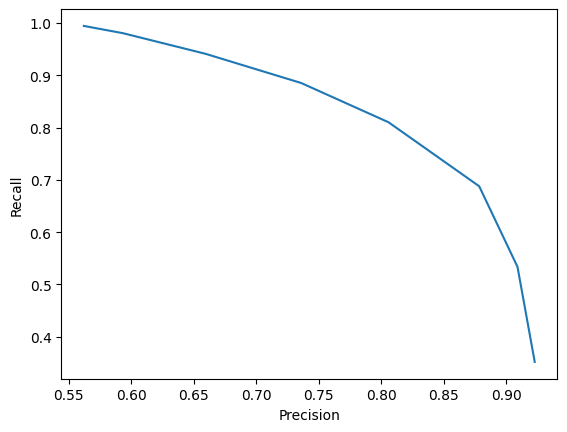

In [66]:
prob_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
recall_l=[]
precision_l=[]
for p in prob_list:
    tp,fp,tn,fn = matrixerr(predictions,y_test,p)
    recall_buf=tp/(tp+fn)
    precision_buf=tp/(tp+fp)
    recall_l.append(recall_buf)
    precision_l.append(precision_buf)

plt.plot( precision_l,recall_l )
plt.xlabel('Precision')
plt.ylabel('Recall')

п.8 Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [68]:
from sklearn.metrics import auc

auc( fpr_l,tpr_l )

0.8276027135901143

п. 9 Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?